<a href="https://colab.research.google.com/github/bernardo-silva/Google-colab-notebooks/blob/main/NFIST_Workshop_FC_Exemplos_F%C3%ADsicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

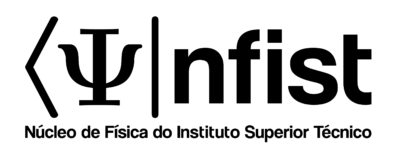           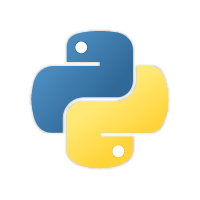



#**O método de Euler**
Sabemos que a aceleração de um corpo pode ser escrita como

- $a = \dfrac{\Delta v}{\Delta t} = \dfrac{v_\text{f} - v_\text{i}}{\Delta t}$ .

Assim, se soubermos aceleração e a velocidade num dado instante de tempo $t$, $v_\text{i}$, e definirmos um intervalo de tempo $\Delta t$ suficientemente pequeno, podemos determinar uma aproximação da velocidade num instante $t+\Delta t$ posterior, $v_\text{f}$ da seguinte forma:

- $v_\text{f} = a\times\Delta t + v_\text{i}$ .



De forma semelhante, como

- $v = \dfrac{\Delta x}{\Delta t} = \dfrac{x_\text{f} - x_\text{i}}{\Delta t}$ ,

podemos escrever que 
- $x_\text{f} = v\times\Delta t + x_\text{i}$ .






#**Aplicação: o sistema massa-mola**

Vamos agora considerar um sistema constituído por uma mola presa por uma das pontas a uma parede e a outra ponta presa a um bloco que se pode mover livremente na direção horizontal.

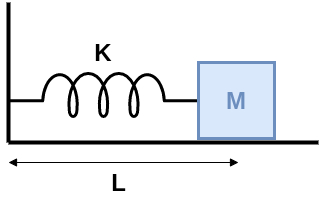



A mola é caracterizada pelo seu comprimento natural (comprimento que apresenta quando não a esticamos nem comprimimos). 

Sabelos ainda, através da **Lei de Hooke**, que a força que a mola exerce, a que vamos chamar $F_\text{m}$, é proporcional ao quanto a mola se encontra deformada (comprimida ou esticada). Ou seja, quanto mais esticamos ou comprimimos a mola, mais força ela faz para voltar ao seu comprimento natural. 

Dum ponto de vista físico, escrevemos esta lei através da seguinte equação:

- $F_\text{m} = k\times\Delta L$

$k$ é a constante de proporcionalidade, chamada constante da mola, e é também uma característica de uma mola (se $k$ for grande, a mola é "forte").

$\Delta L$ é a diferença entre o comprimento natural da mola e o comprimento que tem quando deformada, $\Delta L = L_\text{natural} - L_\text{deformada}$. Assim, podemos ver que:
- Se a mola for comprimida, $L_\text{deformada} < L_\text{natural}$, a força é positiva.
- Se a mola for esticada, $L_\text{deformada} > L_\text{natural}$, a força é negativa.

##**Imports e definições de visualização**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import numpy as np
#import math

In [ ]:
rc('animation', html='html5')

##**Definição de constantes** 

In [ ]:
M   = 1           #massa
K   = 10          #constante da mola
L = 0.2           #comprimento natural da mola
X0  = 0.3         #posição inicial
V0  = 0.1         #velocidade inicial
delta_t = 0.01     #intervalo de tempo
tempo_total = 10  #tempo de simulação em segundos

##**Simulação**

In [ ]:

#Função para desenhar uma mola
def pontos_mola(xmin, xmax, amplitude, voltas):
  periodo = (xmax - xmin)/voltas
  x = np.linspace(xmin, xmax, 100)
  y = amplitude * np.sin(2*np.pi/periodo*(x - xmin))
  return x,y
  

In [ ]:
#Funções que calculam a velocidade e posição de acordo com o método de Euler
def calcular_velocidade(v,a):
  nova_velocidade = a * delta_t + v
  return nova_velocidade

def calcular_posicao(x,v):
  nova_posicao = v * delta_t + x
  return nova_posicao

In [ ]:
#Inicializar variáveis que iremos usar depois
v_bloco = 0
x_bloco = 0
aceleracao = 0

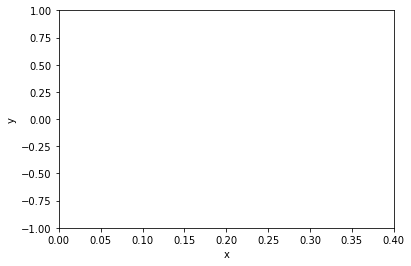

In [ ]:
#Inicializar objetos para visualização

fig, ax = plt.subplots()
ax.set(xlim = (0,2*L),ylim = (-1,1), xlabel="x", ylabel="y") #xlim: limites do eixo dos x
                                                             #ylim: limites do eixo dos y
                                                             #xlabel: legenda do eixo dos x
                                                             #ylabel: legenda do eixo dos y

mola,  = ax.plot([],[],color='k')
bloco, = ax.plot([],[], ls='', marker='s', ms=40)

In [ ]:
def init():
  global x_bloco, v_bloco
  v_bloco = V0
  x_bloco = X0

  mola.set_data([],0)
  bloco.set_data([],0)
  return bloco,mola

def animate(t):
  global x_bloco, v_bloco, aceleracao
  aceleracao = K/M * (L - x_bloco)
  v_bloco = calcular_velocidade(v_bloco, aceleracao)
  x_bloco = calcular_posicao(x_bloco, v_bloco)

  x_mola, y_mola = pontos_mola(0, x_bloco,0.2,4)

  mola.set_data(x_mola,y_mola)
  bloco.set_data(x_bloco,0) 

  return bloco,mola

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=int(tempo_total/delta_t),
                             interval=1000*delta_t,blit=True)
anim

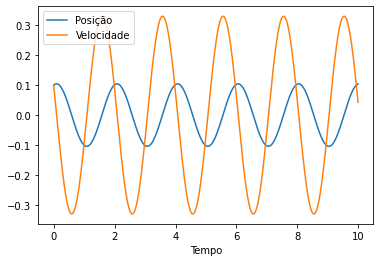

In [ ]:
#Visualização dos gráficos da posição e velocidade em função do tempo
X = []
X.append(X0)

V = []
V.append(V0)

T = np.arange(0,tempo_total,delta_t)

for t in T[1:]:
  aceleracao = K/M * (L - X[-1])
  V.append(calcular_velocidade(V[-1], aceleracao))
  X.append(calcular_posicao(X[-1], V[-1]))

X = [x-L for x in X]

plt.xlabel('Tempo')
plt.plot(T,X,label='Posição')
plt.plot(T,V,label='Velocidade')
plt.legend()  

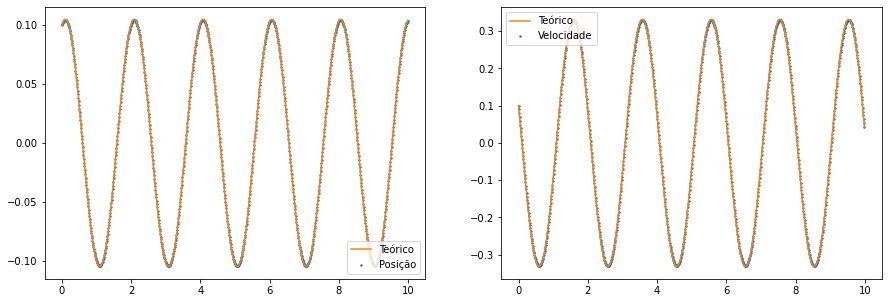

In [ ]:
#Comparar a simulação com a solução teórica
w = np.sqrt(K/M)

figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].scatter(T,X,label='Posição',s=2)
ax[0].plot(T,(X0-L)*np.cos(w*T)+(V0/w)*np.sin(w*T),label='Teórico',color='tab:orange')
ax[0].legend(loc='upper left')

ax[1].scatter(T,V,label='Velocidade',s=2)
ax[1].plot(T,-(X0-L)*w*np.sin(w*T)+V0*np.cos(w*T),label='Teórico',color='tab:orange')
ax[1].legend(loc='upper left')

#**Aplicação: o pêndulo simples**

Consideremos agora o movimento de uma massa presa ao teto por uma haste, o conhecido Pêndulo Simples!

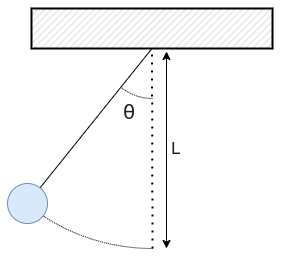



Como sabemos que a distância da massa ao ponto de suporte no teto é sempre constante e igual ao comprimento $L$ da haste, então podemos descrever por completo a posição da massa conhecendo apenas o ângulo que faz com a horizontal, $\theta$.

Deste modo, podemos definir a posição $(x; y)$ do pêndulo com (definindo a origem do referencial no ponto de suporte da haste com o teto):

- $x =\ \ \ L\ \sin(\theta)$
- $y = -L\ \cos(\theta)$

A equação de movimento para o ângulo $\theta$, ou seja, a "aceleração" $\alpha$ do ângulo é dada por:

- $\alpha = -\frac{g}{L}\ \sin(\theta)$

Notamos no facto (curioso) que esta expressão não depende da massa do objeto... 🤔

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import numpy as np

In [ ]:
rc('animation', html='html5')

##**Definição de constantes** 

In [ ]:
g   = 9.8           #gravidade
L = 0.2             #comprimento da haste
ANG0  = np.pi/8      #ângulo inicial
V0  = 0             #velocidade inicial
delta_t = 0.01       #intervalo de tempo
tempo_total = 10    #tempo de simulação em segundos

##**Simulação**

In [ ]:
def calcular_velocidade(v,a):
  nova_velocidade = a * delta_t + v
  return nova_velocidade

def calcular_posicao(x,v):
  nova_posicao = v * delta_t + x
  return nova_posicao

In [ ]:
v_pendulo = 0
ang_pendulo = 0
aceleracao = 0

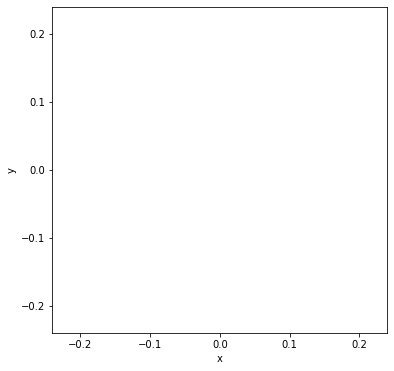

In [ ]:
#Inicializar objetos para visualização

fig, ax = plt.subplots(figsize=[6, 6])
ax.set(xlim = (-1.2*L,1.2*L),ylim = (-1.2*L,1.2*L), xlabel="x", ylabel="y") 

haste,   = ax.plot([], [], color='k')
pendulo, = ax.plot([], [], ls='', marker='o', ms=30)

In [ ]:
def init():
  global ang_pendulo, v_pendulo
  v_pendulo = V0
  ang_pendulo = ANG0

  haste.set_data([], 0)
  pendulo.set_data([], 0)

  return pendulo, haste

def animate(t):
  global ang_pendulo, v_pendulo, aceleracao
  aceleracao = - g / L * np.sin(ang_pendulo)
  v_pendulo = calcular_velocidade(v_pendulo, aceleracao)
  ang_pendulo = calcular_posicao(ang_pendulo, v_pendulo)

  # Converter Coordenadas Polares para Cartesianas
  x_pendulo =  L * np.sin(ang_pendulo)
  y_pendulo = -L * np.cos(ang_pendulo)

  pendulo.set_data(x_pendulo, y_pendulo)
  haste.set_data((0,x_pendulo),(0,y_pendulo)) #linha entre (0,0) e (x_pendulo, y_pendulo)

  return pendulo, haste

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=int(tempo_total/delta_t),
                             interval=1000*delta_t,blit=True)
anim

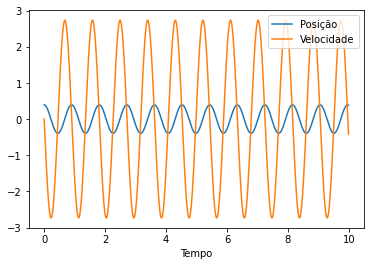

In [ ]:
#Visualização dos gráficos da posição e velocidade em função do tempo
ANG = []
ANG.append(ANG0)

V = []
V.append(V0)

T = np.arange(0,tempo_total,delta_t)

for t in T[1:]:
  aceleracao = - g / L * np.sin(ANG[-1])
  V.append(calcular_velocidade(V[-1], aceleracao))
  ANG.append(calcular_posicao(ANG[-1], V[-1]))

#ANG = [x for x in X]

plt.xlabel('Tempo')
plt.plot(T,ANG,label='Posição')
plt.plot(T,V,label='Velocidade')
plt.legend()  

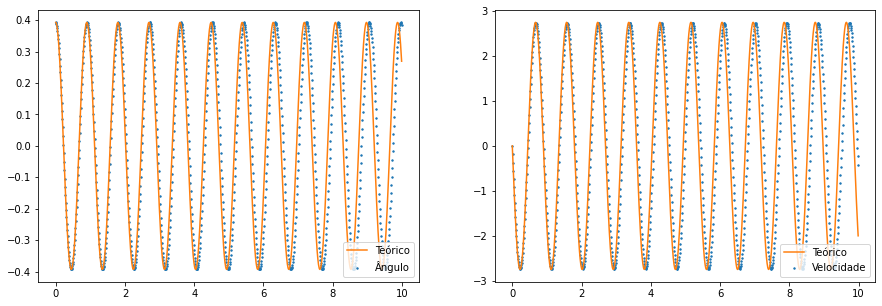

In [ ]:
#Comparar a simulação com a solução teórica
w = np.sqrt(g/L)

figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].scatter(T,ANG,label='Ângulo',s=2)
ax[0].plot(T,ANG0*np.cos(w*T)+(V0/w)*np.sin(w*T),label='Teórico',color='tab:orange')
ax[0].legend(loc='lower right')

ax[1].scatter(T,V,label='Velocidade',s=2)
ax[1].plot(T,-ANG0*w*np.sin(w*T)+V0*np.cos(w*T),label='Teórico',color='tab:orange')
ax[1].legend(loc='lower right')

#**Aplicação: o pêndulo com mola (por acabar a explicação)**

FALTA EXPLICAR ISTO E PÔR UMA IMAGEM BONITA :)

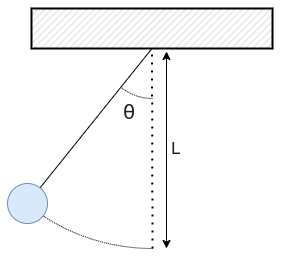



E EXPLICAR ISTO TAMBÉM

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import numpy as np

In [ ]:
def pontos_haste(x1, y1, x2, y2):     # Linha entre pontos (x1, y1) e (x2, y2)
  x_haste = np.linspace(x1, x2, 100)
  y_haste = np.linspace(y1, y2, 100)
  return x_haste, y_haste

def comp_mola(x1, y1, x2, y2):        # Comprimento atual da mola
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [ ]:
rc('animation', html='html5')
FPS = 30

##**Definição de constantes** 

In [ ]:
g   = 9.8             #gravidade
L   = 1             #comprimento natural da haste
M   = 1             #massa
K   = 100            #constante da mola
T0  = np.pi/2       #ângulo inicial
L0  = 0.9            #comprimento inicial
delta_t = 0.1       #intervalo de tempo
tempo_total = 10    #tempo de simulação em segundos

##**Simulação**

In [ ]:
def calcular_velocidade(v,a):
  nova_velocidade = a * delta_t + v
  return nova_velocidade

def calcular_posicao(x,v):
  nova_posicao = v * delta_t + x
  return nova_posicao

In [ ]:
x_corpo = 0
y_corpo = 0
vx_corpo = 0
vy_corpo = 0
ax_corpo = 0
ay_corpo = 0

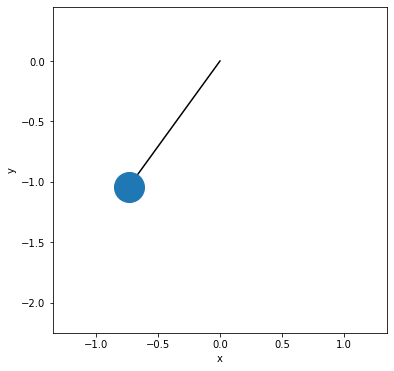

In [ ]:
fig, ax = plt.subplots(figsize=[6, 6])
ax.set(xlim = (-1.5*L0,1.5*L0),ylim = (-2.5*L0,0.5*L0), xlabel="x", ylabel="y") 

haste,   = ax.plot([], [], color='k')
pendulo, = ax.plot([], [], ls='', marker='o', ms=30)


def init():
  global x_corpo, y_corpo, vx_corpo, vy_corpo
  x_corpo =  L0 * np.sin(T0)
  y_corpo = -L0 * np.cos(T0)
  vx_corpo = 0
  vy_corpo = 0

  haste.set_data([], 0)
  pendulo.set_data([], 0)

  return pendulo, haste

def animate(t):
  global x_corpo, y_corpo, vx_corpo, vy_corpo, ax_corpo, ay_corpo

  L_atual = comp_mola(0, 0, x_corpo, y_corpo)
  ax_corpo = K/M * (L - L_atual) * x_corpo/L_atual
  ay_corpo = K/M * (L - L_atual) * y_corpo/L_atual - M*g

  vx_corpo = calcular_velocidade(vx_corpo, ax_corpo)
  vy_corpo = calcular_velocidade(vy_corpo, ay_corpo)

  x_corpo = calcular_posicao(x_corpo, vx_corpo)
  y_corpo = calcular_posicao(y_corpo, vy_corpo)

  x_haste, y_haste = pontos_haste(0, 0, x_corpo, y_corpo)

  pendulo.set_data(x_corpo, y_corpo)
  haste.set_data(x_haste, y_haste)

  return pendulo, haste

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=int(tempo_total/delta_t),
                             interval=1000*delta_t,blit=True)
anim